#### Import necessary libraries

In [27]:
import brawlstats
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
import plotly.io as pio
import seaborn as sns

#### Load data into DataFrame

In [28]:
token = ''
client = brawlstats.Client(token)

top_players = client.get_rankings(ranking='players', limit=200)
lookup = [client.get_player(player['tag']) for player in top_players]

club_tags = []
for x in lookup:
    if len(x.club) == 0:
        club_tags.append(None)
    if x.get_club() is not None:
        a = dict(x.get_club())
        club_tags.append(a['tag'])

club_names = []
for x in lookup:
    if len(x.club) == 0:
        club_names.append(None)
    if x.get_club() is not None:
        a = dict(x.get_club())
        club_names.append(a['name'])

df = pd.DataFrame({'tag': [x.tag for x in lookup], 'name': [x.name for x in lookup], 
                   'name_color': [x.name_color for x in lookup], 'trophies': [x.trophies for x in lookup], 
                   'highest trophies': [x.highest_trophies for x in lookup], 
                   'power_play_points': [x.power_play_points for x in lookup], 
                   'highest_power_play_points': [x.highest_power_play_points for x in lookup],
                   'exp_level': [x.exp_level for x in lookup], 'exp_points': [x.exp_points for x in lookup], 
                   'is_qualified_from_championship_challenge': [x.is_qualified_from_championship_challenge for x in lookup], 
                   'x3vs3_victories': [x.x3vs3_victories for x in lookup], 'team_victories': [x.team_victories for x in lookup],
                   'solo_victories': [x.solo_victories for x in lookup], 'duo_victories': [x.duo_victories for x in lookup],
                   'best_robo_rumble_time': [x.best_robo_rumble_time for x in lookup],
                   'best_time_as_big_brawler': [x.best_time_as_big_brawler for x in lookup],
                   'club_tag': club_tags, 'club_name': club_names,
                   'brawlers': [x.brawlers for x in lookup],
                   'battle_log': [client.get_battle_logs(x['tag'])[0:25] for x in lookup]})

df.to_csv('Brawl_Stars_Data.csv')
df.head()

    


,tag,name,name_color,trophies,highest trophies,power_play_points,highest_power_play_points,exp_level,exp_points,is_qualified_from_championship_challenge,x3vs3_victories,team_victories,solo_victories,duo_victories,best_robo_rumble_time,best_time_as_big_brawler,club_tag,club_name,brawlers,battle_log
0,#VCC2PP8L,sqmmee,0xffcb5aff,56207,56211,None,1290.0,334,568362,False,37842,37842,2416,1541,6,0,None,None,"[{'id': 16000000, 'name': 'SHELLY', 'power': 9...","[{'battle_time': '20211226T201058.000Z', 'even..."
1,#2G0GR9,꧁༺Eend༻꧂,0xff1ba5f5,56089,56089,None,1362.0,382,740720,False,43778,43778,5666,3573,20,0,#2GYPJQ82C,<c5>Just Us</c>,"[{'id': 16000000, 'name': 'SHELLY', 'power': 1...","[{'battle_time': '20211226T201058.000Z', 'even..."
2,#PR9U2JL,VTR|JuanCarlos,0xfff9c908,55735,59425,None,1156.0,324,534461,False,37870,37870,1533,2972,6,0,#2PL28P0CQ,Tribe Gaming NA,"[{'id': 16000000, 'name': 'SHELLY', 'power': 9...","[{'battle_time': '20211226T192335.000Z', 'even..."
3,#VLQPVPY,Hyrayee,0xffcb5aff,55535,64000,None,1374.0,355,641540,False,56758,56758,4946,1580,5,0,None,None,"[{'id': 16000000, 'name': 'SHELLY', 'power': 9...","[{'battle_time': '20211226T201058.000Z', 'even..."
4,#8LQ9JR82,Eqwaak 犬,0xffff8afb,55327,64000,None,1340.0,371,698979,False,70179,70179,223,788,0,0,#208UU822P,A Few Good Men,"[{'id': 16000000, 'name': 'SHELLY', 'power': 1...","[{'battle_time': '20211226T161412.000Z', 'even..."


#### Learning about the dataset/data cleaning

In [29]:
df.shape

(200, 20)

In [30]:
df.size

4000

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 20 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   tag                                       200 non-null    object 
 1   name                                      200 non-null    object 
 2   name_color                                199 non-null    object 
 3   trophies                                  200 non-null    int64  
 4   highest trophies                          200 non-null    int64  
 5   power_play_points                         0 non-null      object 
 6   highest_power_play_points                 198 non-null    float64
 7   exp_level                                 200 non-null    int64  
 8   exp_points                                200 non-null    int64  
 9   is_qualified_from_championship_challenge  200 non-null    bool   
 10  x3vs3_victories                       

In [32]:
df.isnull().sum()

tag                                           0
name                                          0
name_color                                    1
trophies                                      0
highest trophies                              0
power_play_points                           200
highest_power_play_points                     2
exp_level                                     0
exp_points                                    0
is_qualified_from_championship_challenge      0
x3vs3_victories                               0
team_victories                                0
solo_victories                                0
duo_victories                                 0
best_robo_rumble_time                         0
best_time_as_big_brawler                      0
club_tag                                      4
club_name                                     4
brawlers                                      0
battle_log                                    0
dtype: int64

In [33]:
df.describe()

,trophies,highest trophies,highest_power_play_points,exp_level,exp_points,x3vs3_victories,team_victories,solo_victories,duo_victories,best_robo_rumble_time,best_time_as_big_brawler
count,200.000000,200.000000,198.000000,200.000000,200.00000,200.000000,200.000000,200.000000,200.000000,200.00000,200.0
mean,50208.265000,51785.205000,1064.555556,309.120000,495644.61500,29384.715000,29384.715000,1994.450000,3338.555000,9.14000,0.0
std,1505.486247,2641.726184,244.127441,41.353308,129778.38998,14448.795579,14448.795579,1809.811614,2802.002173,5.13735,0.0
min,48733.000000,48764.000000,173.000000,204.000000,214393.00000,1593.000000,1593.000000,50.000000,248.000000,0.00000,0.0
25%,49175.250000,50128.750000,949.750000,284.750000,413576.50000,18973.250000,18973.250000,889.500000,1561.750000,5.00000,0.0
50%,49724.500000,51155.000000,1100.500000,310.500000,491880.00000,28236.000000,28236.000000,1474.500000,2719.500000,7.00000,0.0
75%,50705.750000,52353.750000,1257.250000,336.250000,575754.50000,37652.250000,37652.250000,2429.000000,4240.250000,11.00000,0.0
max,56207.000000,64000.000000,1386.000000,431.000000,939582.00000,79069.000000,79069.000000,15001.000000,24911.000000,20.00000,0.0


In [34]:
# With a mean and stdev of 0, the top players' best time as the big brawler doesn't provide any information so we can drop it:
df.drop(labels=['best_time_as_big_brawler'], axis=1, inplace=True)

In [35]:
# Since the power_play_points column contains solely null values, we can drop it:
df.drop(labels=['power_play_points'], axis=1, inplace=True)

In [36]:
# From the summary statistics, the distribution of 'x3vs3_victories' and 'team_victories' is the same,
# so we can drop one of the columns
df.drop(columns=['x3vs3_victories'], inplace=True)

In [37]:
# Ensure player tag is unique
df.duplicated(subset='tag').sum()

0

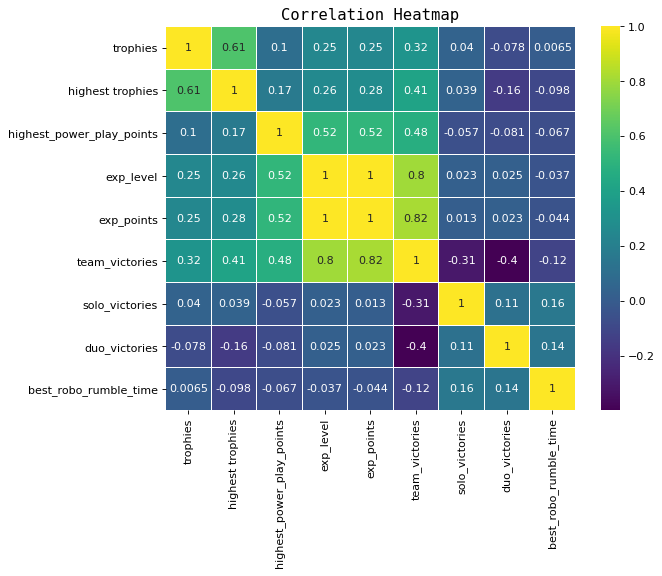

In [38]:
correlation_table = df.loc[:, ~df.columns.isin(['tag', 'brawlers', 'name', 'name_color', 'club_tag', 'club_name', 'is_qualified_from_championship_challenge', 'best_time_as_big_brawler'])].corr()
fig = plt.figure(figsize=(8,6), dpi=80)
ax = fig.add_axes([0,0,0.8,0.8])
sns.heatmap(data=correlation_table, cmap='viridis', linewidths=0.01, annot=True)
ax.set_title(label='Correlation Heatmap', fontfamily='monospace', fontsize=14)
plt.show()

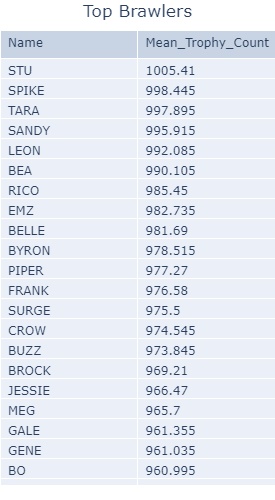

In [39]:
glob = []
glob2 = []
for x in range(0, len(client.get_brawlers())):
    temp = [client.get_brawlers()[x]['name']]
    temp2 = [client.get_brawlers()[x]['name']]
    for player in df['brawlers']:
        try:
            temp.append(player[x]['trophies'])
            temp2.append(player[x]['power'])
        except:
            temp.append(None)
            temp2.append(None)
    glob.append(temp)
    glob2.append(temp2)
    
def get_avg(x):
    acc = 0
    for item in x:
        if item is None:
            continue
        else:
            acc += item
    return acc/len(x)
        
    
brawler_stats = pd.DataFrame({'Name': [x[0] for x in glob], 'Mean_Trophy_Count': [x[1:] for x in glob]})
new = brawler_stats.copy()
new['Power_Level'] = [x[1:] for x in glob2]
brawler_stats['Mean_Trophy_Count'] = brawler_stats['Mean_Trophy_Count'].apply(get_avg)
brawler_stats.sort_values('Mean_Trophy_Count', ascending=False, inplace=True)
brawler_stats.reset_index(drop=True, inplace=True)

fig = go.Figure(data=[go.Table(
    header=dict(values=list(brawler_stats.columns), align='left'),
    cells=dict(values=[brawler_stats['Name'], brawler_stats['Mean_Trophy_Count']], align='left'))
])

fig.update_layout(title={
                    'text': 'Top Brawlers',
                    'y': 0.99,
                    'x': 0.5}, 
                  margin=dict(l=0, r=0, t=30, b=15), 
                  width=275)

fig.show("png")

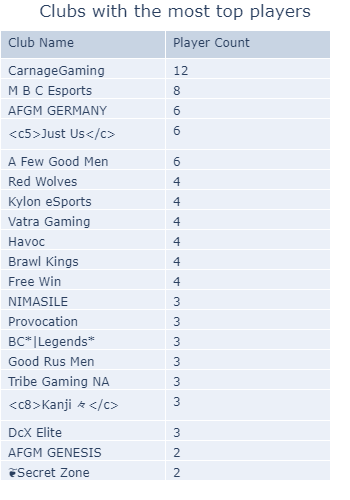

In [40]:
top_players_clubs = df.groupby('club_name', as_index=False).count().sort_values(by='exp_level', ascending=False).head(20)[['club_name', 'name']]
fig = go.Figure(data=[go.Table(
    header=dict(values=list(['Club Name', 'Player Count']), align='left'),
    cells=dict(values=[top_players_clubs['club_name'], top_players_clubs['name']], align='left'))
])

fig.update_layout(title={
                    'text': 'Clubs with the most top players',
                    'y': 0.99,
                    'x': 0.5}, 
                  margin=dict(l=0, r=20, t=30, b=0), 
                  width=350)

fig.show("png")

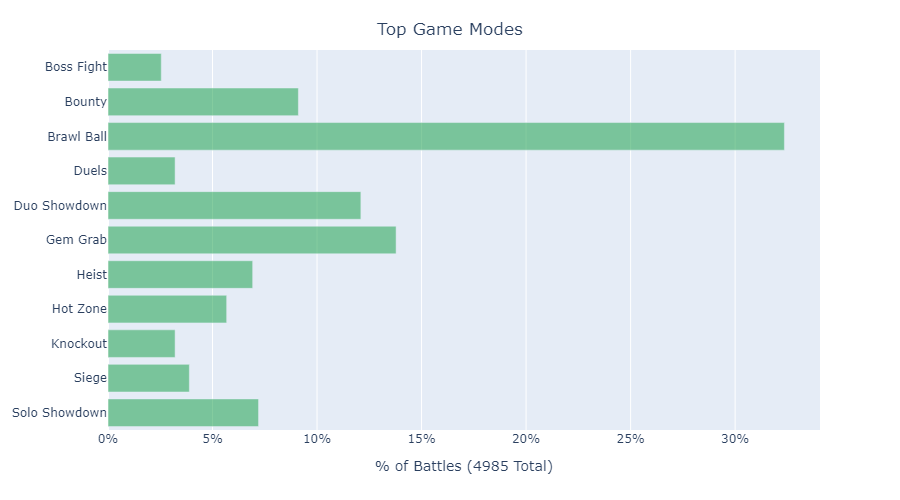

In [41]:
# Get game mode for each battle in battle log
array = np.array([])
for x in range(len(df['battle_log'])):
    for y in range(len(df['battle_log'][x])):
        try:
            array = np.append(array, df['battle_log'][x][y]['battle']['mode'])
        except:
            array = np.append(array, None)

# Get brawler for each battle in battle log
array2 = np.array([])
for x in range(len(df['battle_log'])):
    for y in range(len(df['battle_log'][x])):
        try:
            # If the event is solo showdown, search for the brawler picked by the top player
            if 'teams' not in dict(df['battle_log'][x][y]['battle']).keys() and 'duels' not in dict(df['battle_log'][x][y]['battle']).values():
                for player in df['battle_log'][x][y]['battle']['players']:
                    if df['tag'][x] == player['tag']:
                        array2 = np.append(array2, player['brawler']['name'])
                        
            # If the event is duels, search for the first choice brawler picked by the top player
            elif 'teams' not in dict(df['battle_log'][x][y]['battle']).keys() and 'soloShowdown' not in dict(df['battle_log'][x][y]['battle']).values():
                for player in df['battle_log'][x][y]['battle']['players']:
                    if df['tag'][x] == player['tag']:
                        array2 = np.append(array2, player['brawlers'][0]['name'])
                        
            # If the event is some other team event, iterate through the teams and players on each team to find
            # the brawler that the top player picked
            else:
                for team in df['battle_log'][x][y]['battle']['teams']:
                    for player in team:
                        if df['tag'][x] == player['tag']:
                            array2 = np.append(array2, player['brawler']['name'])
        except:
            array2 = np.append(array2, None)
            
modes = pd.DataFrame({'Game_Mode': array, 'Count': np.ones(len(array)), 'Brawler': array2})
length = len(modes) - max(modes['Game_Mode'].isnull().sum(), modes['Brawler'].isnull().sum())
modes = modes.groupby(['Game_Mode', 'Brawler'], as_index=False).count().sort_values(by=['Game_Mode', 'Count'], ascending=False).reset_index(drop=True)
temp = modes.copy()
modes['Count'] = modes['Count'] / length * 100
modes = modes.groupby('Game_Mode', as_index=False).sum().sort_values(by='Game_Mode', ascending=False)
modes.loc[modes['Game_Mode'] == 'siege', 'Game_Mode'] = 'Siege'
modes.loc[modes['Game_Mode'] == 'knockout', 'Game_Mode'] = 'Knockout'
modes.loc[modes['Game_Mode'] == 'hotZone', 'Game_Mode'] = 'Hot Zone'
modes.loc[modes['Game_Mode'] == 'heist', 'Game_Mode'] = 'Heist'
modes.loc[modes['Game_Mode'] == 'gemGrab', 'Game_Mode'] = 'Gem Grab'
modes.loc[modes['Game_Mode'] == 'duoShowdown', 'Game_Mode'] = 'Duo Showdown'
modes.loc[modes['Game_Mode'] == 'brawlBall', 'Game_Mode'] = 'Brawl Ball'
modes.loc[modes['Game_Mode'] == 'bounty', 'Game_Mode'] = 'Bounty'
modes.loc[modes['Game_Mode'] == 'bossFight', 'Game_Mode'] = 'Boss Fight'
modes.loc[modes['Game_Mode'] == 'soloShowdown', 'Game_Mode'] = 'Solo Showdown'
modes.loc[modes['Game_Mode'] == 'duels', 'Game_Mode'] = 'Duels'

fig = go.Figure()
fig.add_trace(go.Bar(x=modes['Count'],
                y=modes['Game_Mode'],
                marker_color='rgba(50, 171, 96, 0.6)',
                orientation='h'
                ))

fig.update_layout(title={
                    'text': 'Top Game Modes',
                    'xanchor': 'center',
                    'yanchor': 'bottom',
                    'y': 0.93,
                    'x': 0.50}, 
                  xaxis=dict(
                        title=f'% of Battles ({length} Total)',
                        titlefont_size=14,
                        tickfont_size=12,
                        tickvals = np.arange(0, 45, 5),
                        ticktext = ['0%', '5%', '10%', '15%', '20%', '25%', '30%', '35%', '40%']
                    ),
                  yaxis=dict(
                        titlefont_size=14,
                        tickfont_size=12,
                    ),
                  margin=dict(t=50, b=70),
                  width=900)

fig.show("png")


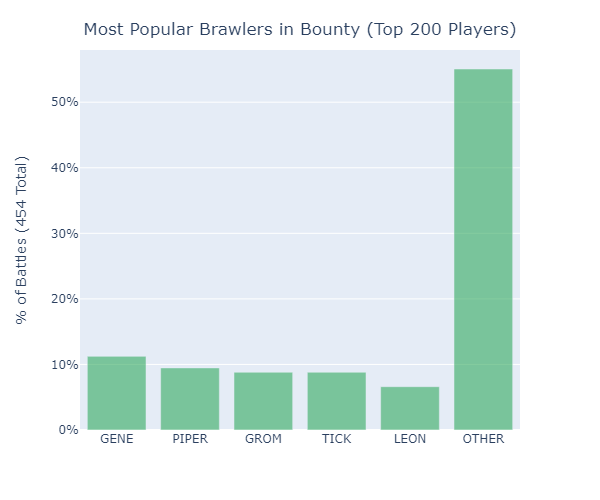

In [42]:
modes2 = temp.copy().groupby('Game_Mode').head(5).reset_index(drop=True)
sums = temp.copy().groupby('Game_Mode', as_index=False).sum()
sums = pd.concat([sums]*5, ignore_index=True).sort_values(by='Game_Mode', ascending=False).reset_index(drop=True)
modes2['Total Count'] = sums['Count']
modes2['% Count'] = modes2['Count'] / modes2['Total Count'] * 100

# Get the 'other' category for all other brawlers
def add_row(x):
    x = x.reset_index(drop=True)
    other_category_count = x['Total Count'][0] - x['Count'][0] - x['Count'][1] - x['Count'][2] - x['Count'][3] - x['Count'][4]
    row = x.iloc[-1]
    row['Count'] = other_category_count
    row['Brawler'] = 'OTHER'
    row['% Count'] = row['Count'] / row['Total Count'] * 100
    x = x.append(row)
    return x

modes2 = modes2.groupby('Game_Mode').apply(add_row)

length3 = modes2.loc[modes2['Game_Mode'] == 'bounty']['Total Count'][0]
bounty = modes2[modes2['Game_Mode'] == 'bounty']

fig = go.Figure()
fig.add_trace(go.Bar(x=bounty['Brawler'], y=bounty['% Count'], marker_color='rgba(50, 171, 96, 0.6)'))

fig.update_layout(title={
                    'text': 'Most Popular Brawlers in Bounty (Top 200 Players)',
                    'xanchor': 'center',
                    'yanchor': 'bottom',
                    'y': 0.93,
                    'x': 0.50},
                  yaxis=dict(
                        title=f'% of Battles ({length3} Total)',
                        titlefont_size=14,
                        tickfont_size=12,
                        tickvals = np.arange(0, 70, 10),
                        ticktext = ['0%', '10%', '20%', '30%', '40%', '50%', '60%']
                    ),
                 margin=dict(t=50, b=70),
                 width=600)

fig.show("png")

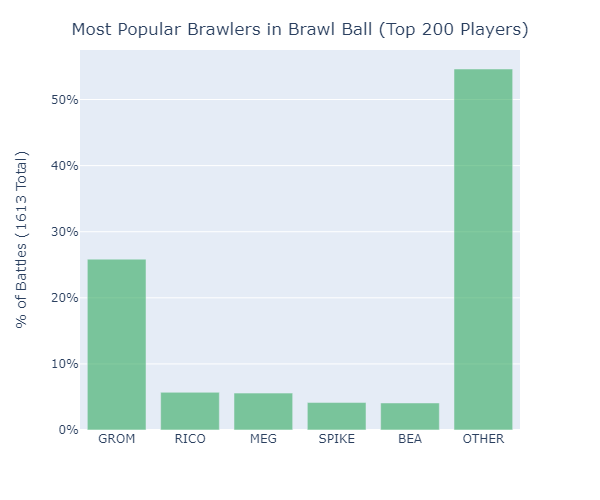

In [43]:
length4 = modes2.loc[modes2['Game_Mode'] == 'brawlBall']['Total Count'][0]
brawlBall = modes2[modes2['Game_Mode'] == 'brawlBall']

fig = go.Figure()
fig.add_trace(go.Bar(x=brawlBall['Brawler'], y=brawlBall['% Count'], marker_color='rgba(50, 171, 96, 0.6)'))

fig.update_layout(title={
                    'text': 'Most Popular Brawlers in Brawl Ball (Top 200 Players)',
                    'xanchor': 'center',
                    'yanchor': 'bottom',
                    'y': 0.93,
                    'x': 0.50},
                  yaxis=dict(
                        title=f'% of Battles ({length4} Total)',
                        titlefont_size=14,
                        tickfont_size=12,
                        tickvals = np.arange(0, 70, 10),
                        ticktext = ['0%', '10%', '20%', '30%', '40%', '50%', '60%']
                    ),
                 margin=dict(t=50, b=70),
                 width=600)

fig.show("png")

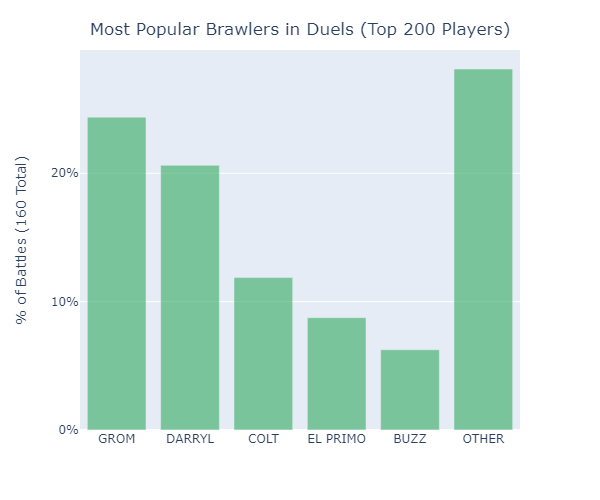

In [44]:
length5 = modes2.loc[modes2['Game_Mode'] == 'duels']['Total Count'][0]
duels = modes2[modes2['Game_Mode'] == 'duels']

fig = go.Figure()
fig.add_trace(go.Bar(x=duels['Brawler'], y=duels['% Count'], marker_color='rgba(50, 171, 96, 0.6)'))

fig.update_layout(title={
                    'text': 'Most Popular Brawlers in Duels (Top 200 Players)',
                    'xanchor': 'center',
                    'yanchor': 'bottom',
                    'y': 0.93,
                    'x': 0.50},
                  yaxis=dict(
                        title=f'% of Battles ({length5} Total)',
                        titlefont_size=14,
                        tickfont_size=12,
                        tickvals = np.arange(0, 70, 10),
                        ticktext = ['0%', '10%', '20%', '30%', '40%', '50%', '60%']
                    ),
                 margin=dict(t=50, b=70),
                 width=600)

fig.show("png")

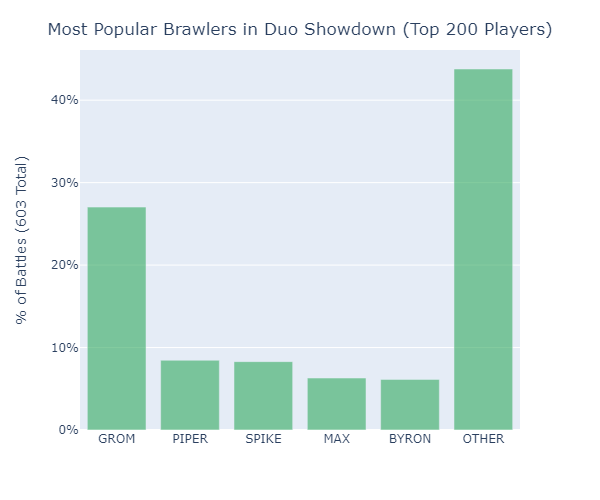

In [45]:
length6 = modes2.loc[modes2['Game_Mode'] == 'duoShowdown']['Total Count'][0]
duoShowdown = modes2[modes2['Game_Mode'] == 'duoShowdown']

fig = go.Figure()
fig.add_trace(go.Bar(x=duoShowdown['Brawler'], y=duoShowdown['% Count'], marker_color='rgba(50, 171, 96, 0.6)'))

fig.update_layout(title={
                    'text': 'Most Popular Brawlers in Duo Showdown (Top 200 Players)',
                    'xanchor': 'center',
                    'yanchor': 'bottom',
                    'y': 0.93,
                    'x': 0.50},
                  yaxis=dict(
                        title=f'% of Battles ({length6} Total)',
                        titlefont_size=14,
                        tickfont_size=12,
                        tickvals = np.arange(0, 70, 10),
                        ticktext = ['0%', '10%', '20%', '30%', '40%', '50%', '60%']
                    ),
                 margin=dict(t=50, b=70),
                 width=600)

fig.show("png")

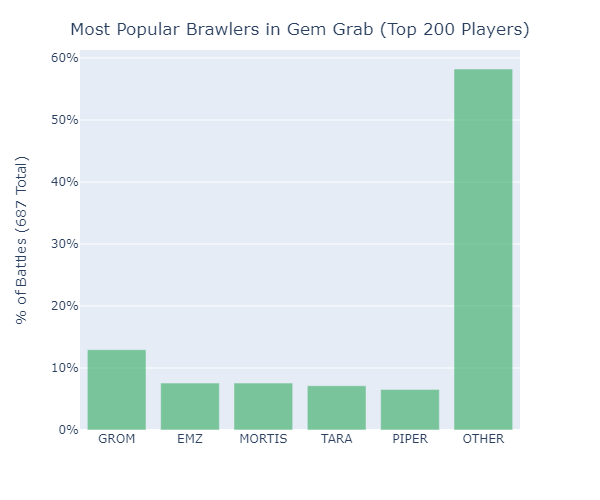

In [46]:
length7 = modes2.loc[modes2['Game_Mode'] == 'gemGrab']['Total Count'][0]
gemGrab = modes2[modes2['Game_Mode'] == 'gemGrab']

fig = go.Figure()
fig.add_trace(go.Bar(x=gemGrab['Brawler'], y=gemGrab['% Count'], marker_color='rgba(50, 171, 96, 0.6)'))

fig.update_layout(title={
                    'text': 'Most Popular Brawlers in Gem Grab (Top 200 Players)',
                    'xanchor': 'center',
                    'yanchor': 'bottom',
                    'y': 0.93,
                    'x': 0.50},
                  yaxis=dict(
                        title=f'% of Battles ({length7} Total)',
                        titlefont_size=14,
                        tickfont_size=12,
                        tickvals = np.arange(0, 70, 10),
                        ticktext = ['0%', '10%', '20%', '30%', '40%', '50%', '60%']
                    ),
                 margin=dict(t=50, b=70),
                 width=600)

fig.show("png")

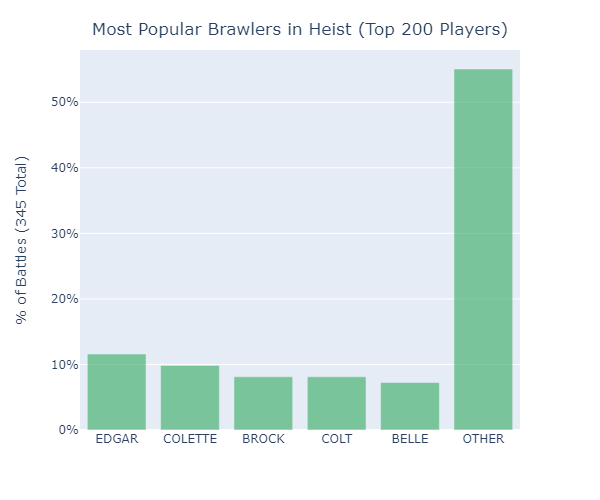

In [47]:
length8 = modes2.loc[modes2['Game_Mode'] == 'heist']['Total Count'][0]
heist = modes2[modes2['Game_Mode'] == 'heist']

fig = go.Figure()
fig.add_trace(go.Bar(x=heist['Brawler'], y=heist['% Count'], marker_color='rgba(50, 171, 96, 0.6)'))

fig.update_layout(title={
                    'text': 'Most Popular Brawlers in Heist (Top 200 Players)',
                    'xanchor': 'center',
                    'yanchor': 'bottom',
                    'y': 0.93,
                    'x': 0.50},
                  yaxis=dict(
                        title=f'% of Battles ({length8} Total)',
                        titlefont_size=14,
                        tickfont_size=12,
                        tickvals = np.arange(0, 70, 10),
                        ticktext = ['0%', '10%', '20%', '30%', '40%', '50%', '60%']
                    ),
                 margin=dict(t=50, b=70),
                 width=600)

fig.show("png")

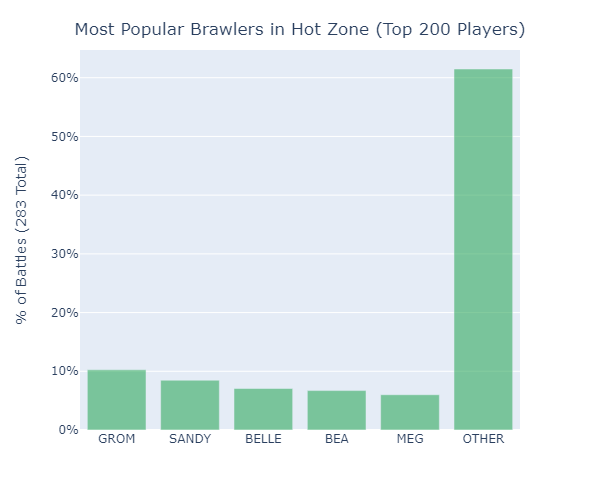

In [48]:
length9 = modes2.loc[modes2['Game_Mode'] == 'hotZone']['Total Count'][0]
hotZone = modes2[modes2['Game_Mode'] == 'hotZone']

fig = go.Figure()
fig.add_trace(go.Bar(x=hotZone['Brawler'], y=hotZone['% Count'], marker_color='rgba(50, 171, 96, 0.6)'))

fig.update_layout(title={
                    'text': 'Most Popular Brawlers in Hot Zone (Top 200 Players)',
                    'xanchor': 'center',
                    'yanchor': 'bottom',
                    'y': 0.93,
                    'x': 0.50},
                  yaxis=dict(
                        title=f'% of Battles ({length9} Total)',
                        titlefont_size=14,
                        tickfont_size=12,
                        tickvals = np.arange(0, 70, 10),
                        ticktext = ['0%', '10%', '20%', '30%', '40%', '50%', '60%']
                    ),
                 margin=dict(t=50, b=70),
                 width=600)

fig.show("png")

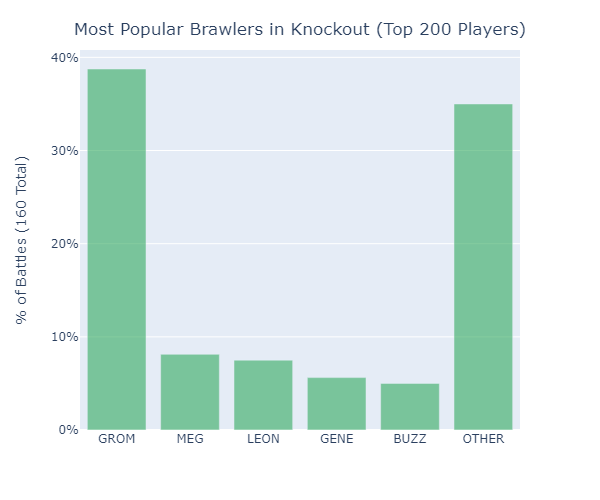

In [49]:
length12 = modes2.loc[modes2['Game_Mode'] == 'knockout']['Total Count'][0]
knockout = modes2[modes2['Game_Mode'] == 'knockout']

fig = go.Figure()
fig.add_trace(go.Bar(x=knockout['Brawler'], y=knockout['% Count'], marker_color='rgba(50, 171, 96, 0.6)'))

fig.update_layout(title={
                    'text': 'Most Popular Brawlers in Knockout (Top 200 Players)',
                    'xanchor': 'center',
                    'yanchor': 'bottom',
                    'y': 0.93,
                    'x': 0.50},
                  yaxis=dict(
                        title=f'% of Battles ({length12} Total)',
                        titlefont_size=14,
                        tickfont_size=12,
                        tickvals = np.arange(0, 70, 10),
                        ticktext = ['0%', '10%', '20%', '30%', '40%', '50%', '60%']
                    ),
                 margin=dict(t=50, b=70),
                 width=600)

fig.show("png")

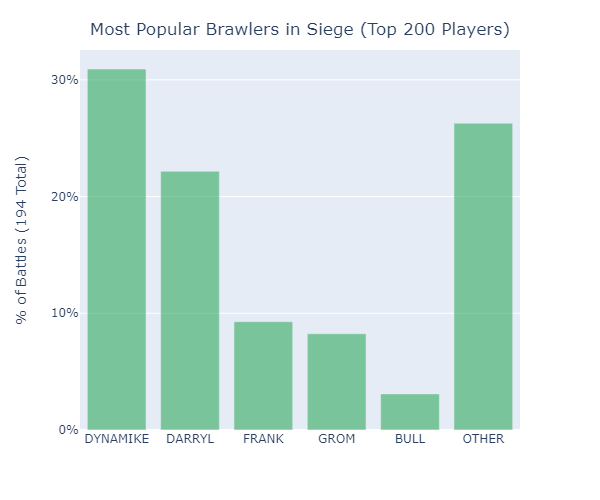

In [50]:
length1 = modes2.loc[modes2['Game_Mode'] == 'siege']['Total Count'][0]
siege = modes2[modes2['Game_Mode'] == 'siege']

fig = go.Figure()
fig.add_trace(go.Bar(x=siege['Brawler'], y=siege['% Count'], marker_color='rgba(50, 171, 96, 0.6)'))

fig.update_layout(title={
                    'text': 'Most Popular Brawlers in Siege (Top 200 Players)',
                    'xanchor': 'center',
                    'yanchor': 'bottom',
                    'y': 0.93,
                    'x': 0.50},
                  yaxis=dict(
                        title=f'% of Battles ({length1} Total)',
                        titlefont_size=14,
                        tickfont_size=12,
                        tickvals = np.arange(0, 50, 10),
                        ticktext = ['0%', '10%', '20%', '30%', '40%']
                    ),
                 margin=dict(t=50, b=70),
                 width=600)

fig.show("png")

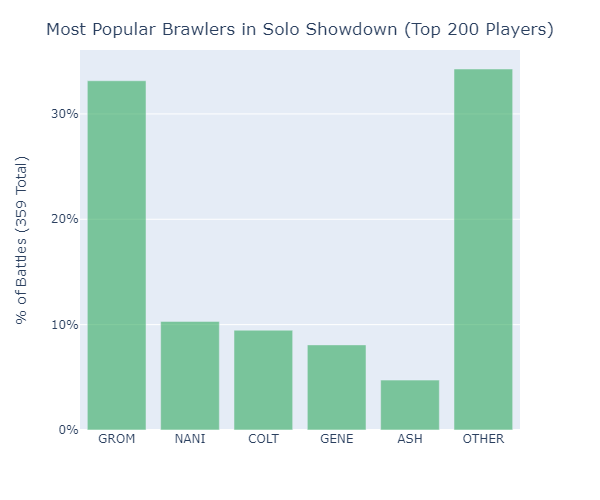

In [51]:
length2 = modes2.loc[modes2['Game_Mode'] == 'soloShowdown']['Total Count'][0]
soloShowdown = modes2[modes2['Game_Mode'] == 'soloShowdown']

fig = go.Figure()
fig.add_trace(go.Bar(x=soloShowdown['Brawler'], y=soloShowdown['% Count'], marker_color='rgba(50, 171, 96, 0.6)'))

fig.update_layout(title={
                    'text': 'Most Popular Brawlers in Solo Showdown (Top 200 Players)',
                    'xanchor': 'center',
                    'yanchor': 'bottom',
                    'y': 0.93,
                    'x': 0.50},
                  yaxis=dict(
                        title=f'% of Battles ({length2} Total)',
                        titlefont_size=14,
                        tickfont_size=12,
                        tickvals = np.arange(0, 70, 10),
                        ticktext = ['0%', '10%', '20%', '30%', '40%', '50%', '60%']
                    ),
                 margin=dict(t=50, b=70),
                 width=600)

fig.show("png")

The correlation between the Mean Trophy Count and the Mean Power Level across all brawlers in the game is 0.7969263117905919.


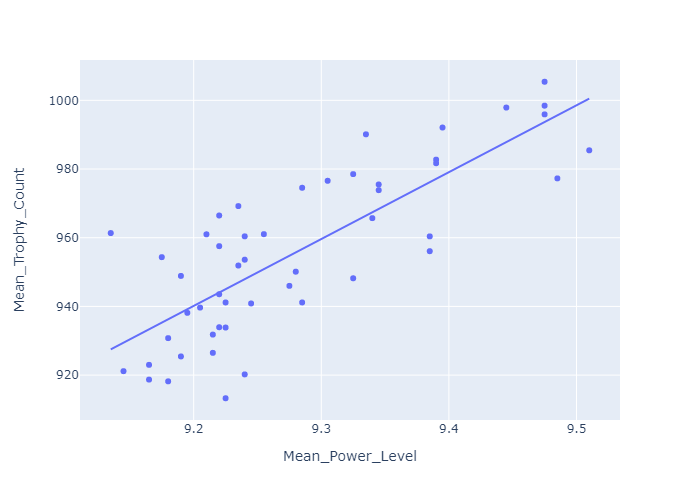

In [52]:
new1 = new.copy()

mean_trophy_count = []
mean_power_level = []
for x in new.iterrows():
    mean1 = get_avg(x[1]['Mean_Trophy_Count'])
    mean2 = get_avg(x[1]['Power_Level'])
    mean_trophy_count.append(mean1)
    mean_power_level.append(mean2)

new1['Mean_Trophy_Count'] = mean_trophy_count  
new1['Power_Level'] = mean_power_level
new1.rename(columns={'Power_Level': 'Mean_Power_Level'}, inplace=True)

# Computing outliers - Mean_Trophy_Count
q1_mean_trophy = new1['Mean_Trophy_Count'].quantile(q=0.25)
q3_mean_trophy = new1['Mean_Trophy_Count'].quantile(q=0.75)
IQR_mean_trophy = q3_mean_trophy - q1_mean_trophy
lower_fence_mean_trophy = q1_mean_trophy - (1.5 * IQR_mean_trophy)
upper_fence_mean_trophy = q3_mean_trophy + (1.5 * IQR_mean_trophy)

# Computing outliers - Mean_Power_Level
q1_mean_power_level = new1['Mean_Power_Level'].quantile(q=0.25)
q3_mean_power_level = new1['Mean_Power_Level'].quantile(q=0.75)
IQR_mean_power_level = q3_mean_power_level - q1_mean_power_level
lower_fence_mean_power_level = q1_mean_power_level - (1.5 * IQR_mean_power_level)
upper_fence_mean_power_level = q3_mean_power_level + (1.5 * IQR_mean_power_level)

# Ensure data points are within fences for each column
new1 = new1[(new1['Mean_Trophy_Count'] >= lower_fence_mean_trophy) &
            (new1['Mean_Trophy_Count'] <= upper_fence_mean_trophy) &
            (new1['Mean_Power_Level'] >= lower_fence_mean_power_level) &
            (new1['Mean_Power_Level'] <= upper_fence_mean_power_level)]

print('The correlation between the Mean Trophy Count and the Mean Power Level across all brawlers' +
      f' in the game is {new1.corr().iloc[0,1]}.')

import plotly.express as px

fig = px.scatter(new1, x="Mean_Power_Level", y="Mean_Trophy_Count", trendline="ols")
fig.show("png")
